In [2]:
import sys
print(sys.executable)


c:\Users\dshre\AppData\Local\Programs\Python\Python313\python.exe


In [5]:
import pandas as pd

# Load the Excel file
file_path = "SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"

# If you don't know the sheet name:
excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)  # shows all available sheet names


['Cover', 'Contents', 'Data Dictionary', 'Sources', 'LCIA Factors of Other GHGs', '2016_Summary_Commodity', '2015_Summary_Commodity', '2014_Summary_Commodity', '2013_Summary_Commodity', '2012_Summary_Commodity', '2011_Summary_Commodity', '2010_Summary_Commodity', '2016_Summary_Industry', '2015_Summary_Industry', '2014_Summary_Industry', '2013_Summary_Industry', '2012_Summary_Industry', '2011_Summary_Industry', '2010_Summary_Industry', '2016_Detail_Commodity', '2015_Detail_Commodity', '2014_Detail_Commodity', '2013_Detail_Commodity', '2012_Detail_Commodity', '2011_Detail_Commodity', '2010_Detail_Commodity', '2016_Detail_Industry', '2015_Detail_Industry', '2014_Detail_Industry', '2013_Detail_Industry', '2012_Detail_Industry', '2011_Detail_Industry', '2010_Detail_Industry', 'Sheet1']


In [6]:
df = pd.read_excel(file_path, sheet_name='2016_Summary_Commodity')  # Replace with actual sheet name
df.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1


In [7]:
# View basic info
df.info()

# Drop completely empty rows/columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Rename columns (if names are messy or generic like 'Unnamed: 0')
df.columns = [col.strip() for col in df.columns]  # remove leading/trailing whitespace


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without M

In [8]:
# View missing data
print(df.isnull().sum())

# Fill missing values
df.fillna(0, inplace=True)  # OR df.fillna(method='ffill', inplace=True)

# Drop rows with missing values (if critical)
# df.dropna(subset=['ImportantColumn'], inplace=True)


Commodity Code                                            0
Commodity Name                                            0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
dtype: int64


In [9]:
top_emitters = df.groupby('Commodity Name')['Supply Chain Emission Factors with Margins'].sum().sort_values(ascending=False).head(10)
print(top_emitters)


Commodity Name
Utilities                      2.899
Truck transportation           1.341
Pipeline transportation        1.119
Air transportation             0.875
Petroleum and coal products    0.796
Mining, except oil and gas     0.777
Rail transportation            0.698
Water transportation           0.694
Oil and gas extraction         0.601
Farms                          0.545
Name: Supply Chain Emission Factors with Margins, dtype: float64


In [10]:
substance_profile = df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean().sort_values(ascending=False)
print(substance_profile)


Substance
carbon dioxide    0.313485
other GHGs        0.007182
methane           0.003697
nitrous oxide     0.000045
Name: Supply Chain Emission Factors with Margins, dtype: float64


In [11]:
high_emitters = df[df['Supply Chain Emission Factors with Margins'] > 1.0]
print(high_emitters[['Commodity Name', 'Substance', 'Supply Chain Emission Factors with Margins']])


              Commodity Name       Substance  \
20                 Utilities  carbon dioxide   
132     Truck transportation  carbon dioxide   
140  Pipeline transportation  carbon dioxide   

     Supply Chain Emission Factors with Margins  
20                                        2.884  
132                                       1.318  
140                                       1.080  


C:\Users\dshre\AppData\Local\Temp\ipykernel_9524\3025069915.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="magma")


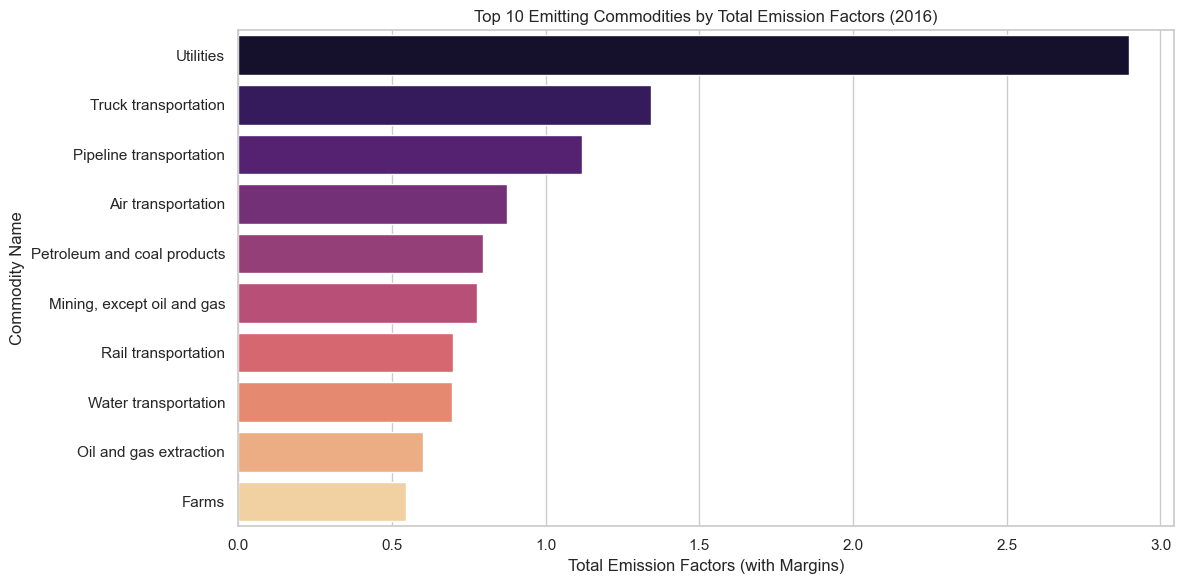

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Load Excel file
file_path = "SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"
df = pd.read_excel(file_path, sheet_name="2016_Summary_Commodity")

# Clean column names (optional but good practice)
df.columns = [col.strip() for col in df.columns]

# Group by Commodity Name and sum the emission factors (including margins)
top_emitters = (
    df.groupby('Commodity Name')['Supply Chain Emission Factors with Margins']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="magma")

plt.xlabel("Total Emission Factors (with Margins)")
plt.ylabel("Commodity Name")
plt.title("Top 10 Emitting Commodities by Total Emission Factors (2016)")
plt.tight_layout()
plt.show()
